In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
data = pd.read_csv("E:\Kishore\Machine Learning Internship\Dataset.csv")

# Check available columns in the dataset
print("Available columns in the dataset:")
print(data.columns)

Available columns in the dataset:
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [30]:
# Define all possible features
all_features = [
    'Country Code', 'City', 'Locality', 'Longitude', 'Latitude',
    'Cuisines', 'Average Cost for Two', 'Currency', 'Has Table Booking',
    'Has Online Delivery', 'Is Delivering Now', 'Switch to Order Menu',
    'Price Range', 'Votes'
]

# Select only the available features in the dataset
features = [feature for feature in all_features if feature in data.columns]
print("\nSelected features for the model:")
print(features)

target = 'Aggregate rating'



Selected features for the model:
['Country Code', 'City', 'Locality', 'Longitude', 'Latitude', 'Cuisines', 'Currency', 'Votes']


In [31]:
X = data[features]
y = data[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Preprocessing
numeric_features = ['Longitude', 'Latitude', 'Average Cost for Two', 'Votes']
numeric_features = [feature for feature in numeric_features if feature in X.columns]

categorical_features = [
    'Country Code', 'City', 'Locality', 'Cuisines', 'Currency', 'Has Table Booking',
    'Has Online Delivery', 'Is Delivering Now', 'Switch to Order Menu', 'Price Range'
]
categorical_features = [feature for feature in categorical_features if feature in X.columns]

In [33]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [34]:
# Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}


In [35]:
# Function to evaluate model
def evaluate_model(model):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2, y_pred

In [36]:
# Evaluate all models
results = {}
predictions = {}
for name, model in models.items():
    mae, mse, r2, y_pred = evaluate_model(model)
    results[name] = (mae, mse, r2)
    predictions[name] = y_pred

In [37]:
# Print results
for name, (mae, mse, r2) in results.items():
    print(f'{name}:')
    print(f'  MAE: {mae}')
    print(f'  MSE: {mse}')
    print(f'  R²: {r2}')
    print()

Linear Regression:
  MAE: 0.8727169033530655
  MSE: 1.4006356924080148
  R²: 0.3846359298385049

Random Forest:
  MAE: 0.19652747252747257
  MSE: 0.0914317216117216
  R²: 0.9598298139495993

Gradient Boosting:
  MAE: 0.21161584383032378
  MSE: 0.09702038808215879
  R²: 0.9573744541692765



In [38]:
# Visualization
plt.figure(figsize=(18, 5))


<Figure size 1296x360 with 0 Axes>

<Figure size 1296x360 with 0 Axes>

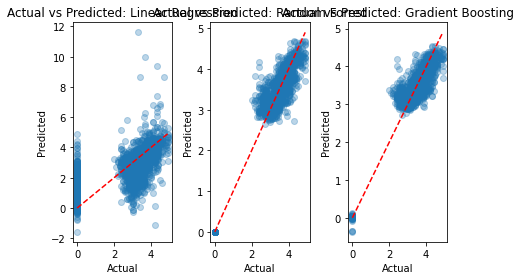

In [39]:
# Actual vs Predicted
for i, (name, y_pred) in enumerate(predictions.items()):
    plt.subplot(1, 3, i + 1)
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted: {name}')

plt.tight_layout()
plt.show()

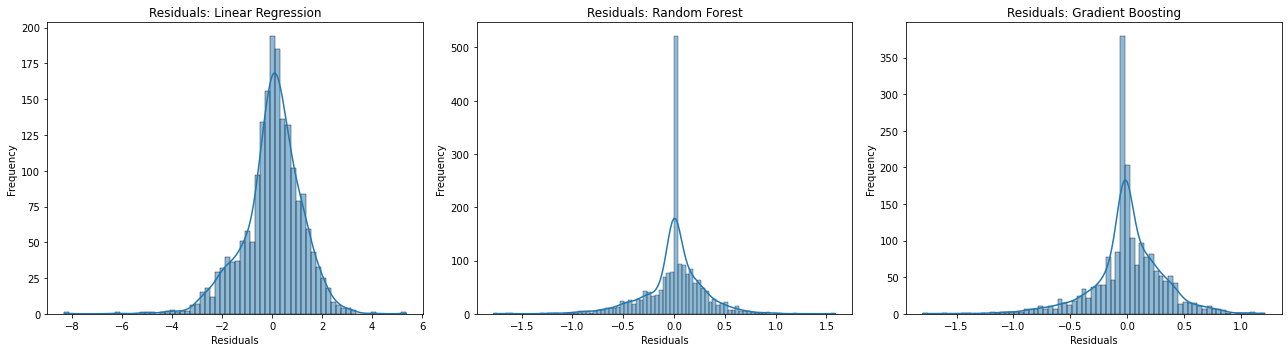

In [40]:
# Residual plots
plt.figure(figsize=(18, 5))

for i, (name, y_pred) in enumerate(predictions.items()):
    plt.subplot(1, 3, i + 1)
    sns.histplot(y_test - y_pred, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(f'Residuals: {name}')

plt.tight_layout()
plt.show()

<Figure size 720x360 with 0 Axes>

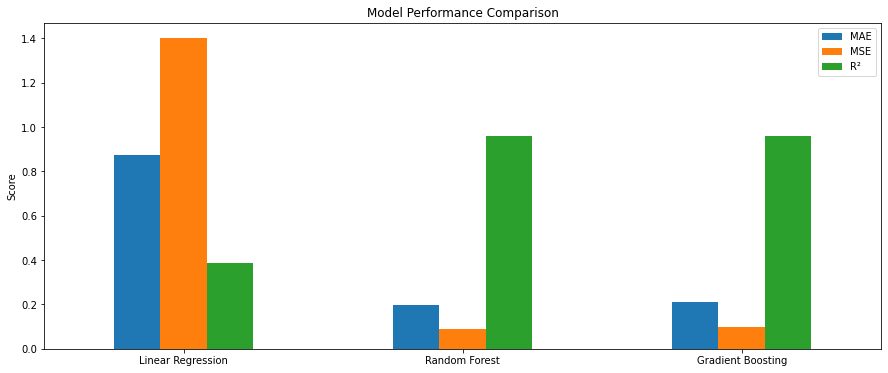

In [41]:
# Performance Metrics Comparison
metrics_df = pd.DataFrame(results, index=['MAE', 'MSE', 'R²']).T

plt.figure(figsize=(10, 5))
metrics_df.plot(kind='bar', figsize=(15, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()
